In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
import pandas as pd

# Carregar os dados do Excel (ajuste o caminho se necessário)
arquivo = "ANG_R10_Converted.xlsx"  # ou o caminho completo se estiver fora da pasta
df = pd.read_excel(arquivo, sheet_name="Sheet1")

# Criar variáveis
variaveis_alvo = ['Q70A', 'Q70B', 'Q70C']
variaveis_explicativas = ['URBRUR', 'REGION', 'EA_SVC_A', 'EA_SVC_B', 'EA_SVC_C', 'EA_SVC_D', 'EA_SVC_E']

# Criar novo dataframe sem valores nulos
df_modelo = df[variaveis_alvo + variaveis_explicativas].dropna()

# Definir X e y (exemplo com Q70A)
X = df_modelo[variaveis_explicativas]
y = df_modelo['Q70A']


In [9]:
# Passo 1: Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Passo 2: Carregar os dados
arquivo = "ANG_R10_Converted.xlsx"
df = pd.read_excel(arquivo, sheet_name="Sheet1")

# Passo 3: Definir variáveis
variaveis_alvo = ['Q70A', 'Q70B', 'Q70C']
variaveis_explicativas = ['URBRUR', 'REGION', 'EA_SVC_A', 'EA_SVC_B', 'EA_SVC_C', 'EA_SVC_D', 'EA_SVC_E']

# Criar dataframe apenas com as colunas necessárias
df_modelo = df[variaveis_alvo + variaveis_explicativas].dropna()

# Passo 4: Remover valores inválidos (ex: 9 = não sabe/não respondeu)
df_modelo_filtrado = df_modelo[
    (df_modelo['Q70A'] <= 5) & (df_modelo['Q70B'] <= 5) & (df_modelo['Q70C'] <= 5)
]

# Passo 5: Treinar modelos para cada variável-alvo
X = df_modelo_filtrado[variaveis_explicativas]
resultados_modelo = {}

for alvo in variaveis_alvo:
    y = df_modelo_filtrado[alvo]
    
    # Dividir dados
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Treinar Random Forest com balanceamento
    modelo = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    modelo.fit(X_train, y_train)

    # Previsão e avaliação
    y_pred = modelo.predict(X_test)
    relatorio = classification_report(y_test, y_pred, output_dict=True)
    print(f"\n--- Relatório para {alvo} ---")
    print(pd.DataFrame(relatorio).transpose())



--- Relatório para Q70A ---
              precision    recall  f1-score     support
1              0.096774  0.157895  0.120000   19.000000
2              0.370370  0.222222  0.277778   45.000000
3              0.116279  0.333333  0.172414   15.000000
4              0.554054  0.401961  0.465909  102.000000
5              0.270270  0.322581  0.294118   31.000000
accuracy       0.325472  0.325472  0.325472    0.325472
macro avg      0.281550  0.287598  0.266044  212.000000
weighted avg   0.401611  0.325472  0.349088  212.000000

--- Relatório para Q70B ---
              precision    recall  f1-score     support
1              0.038462  0.090909  0.054054   11.000000
2              0.343750  0.275000  0.305556   40.000000
3              0.017544  0.076923  0.028571   13.000000
4              0.567164  0.339286  0.424581  112.000000
5              0.233333  0.194444  0.212121   36.000000
accuracy       0.273585  0.273585  0.273585    0.273585
macro avg      0.240051  0.195312  0.204977  2

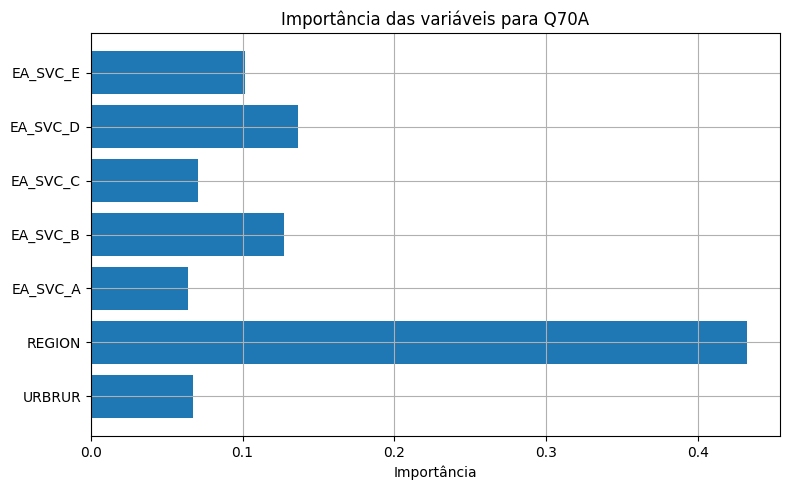

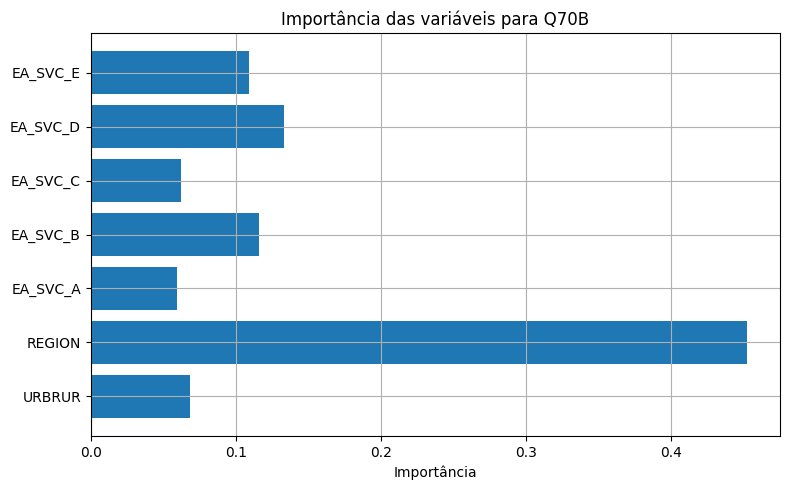

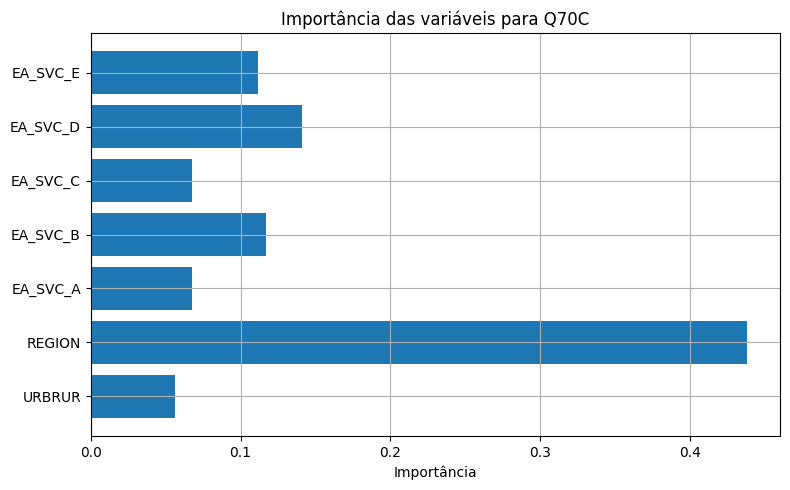

In [10]:
import matplotlib.pyplot as plt

# Certifique-se de ter treinado os modelos com esta estrutura:
modelos = {}  # para armazenar os modelos treinados

for alvo in variaveis_alvo:
    y = df_modelo_filtrado[alvo]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    modelo = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    modelo.fit(X_train, y_train)
    modelos[alvo] = modelo  # guardar modelo para plotagem

# Gerar gráficos de importância para cada variável-alvo
for alvo in variaveis_alvo:
    modelo = modelos[alvo]
    importancias = modelo.feature_importances_
    
    plt.figure(figsize=(8, 5))
    plt.barh(variaveis_explicativas, importancias)
    plt.xlabel('Importância')
    plt.title(f'Importância das variáveis para {alvo}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



--- Relatório para Q70A ---
              precision    recall  f1-score     support
1              0.000000  0.000000  0.000000   19.000000
2              0.428571  0.200000  0.272727   45.000000
3              0.250000  0.066667  0.105263   15.000000
4              0.500000  0.833333  0.625000  102.000000
5              0.214286  0.096774  0.133333   31.000000
accuracy       0.462264  0.462264  0.462264    0.462264
macro avg      0.278571  0.239355  0.227265  212.000000
weighted avg   0.380559  0.462264  0.385542  212.000000

--- Relatório para Q70B ---
              precision    recall  f1-score     support
1              0.000000  0.000000  0.000000   11.000000
2              0.272727  0.150000  0.193548   40.000000
3              0.000000  0.000000  0.000000   13.000000
4              0.556886  0.830357  0.666667  112.000000
5              0.176471  0.083333  0.113208   36.000000
accuracy       0.481132  0.481132  0.481132    0.481132
macro avg      0.201217  0.212738  0.194685  2

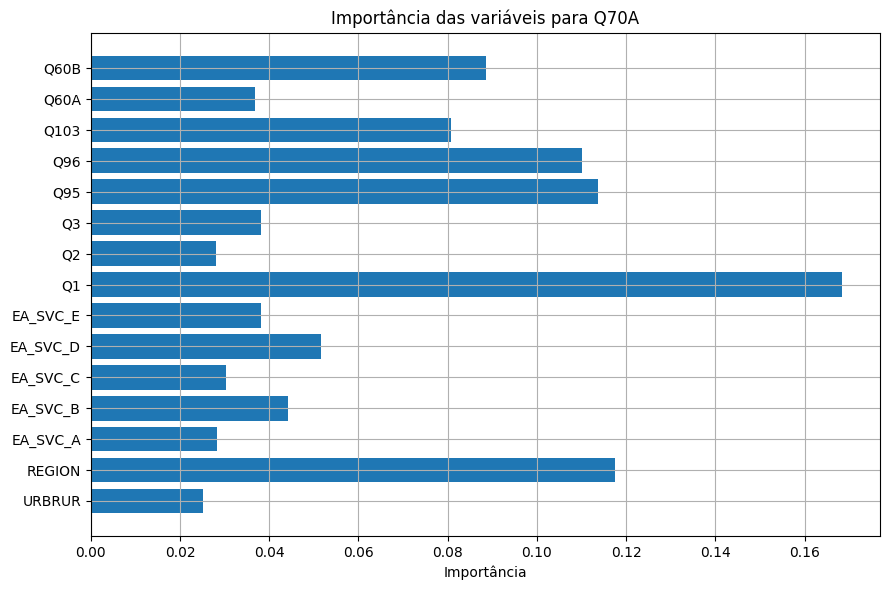

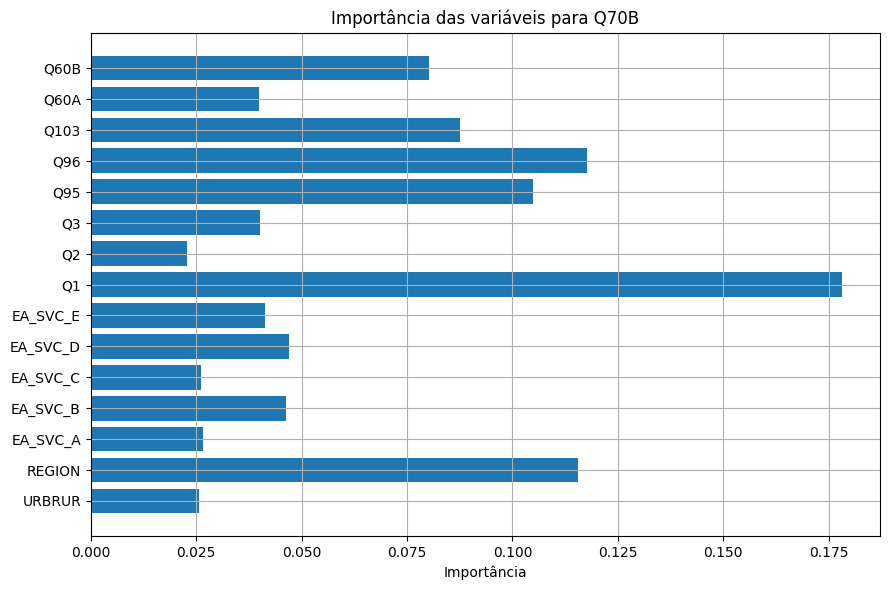

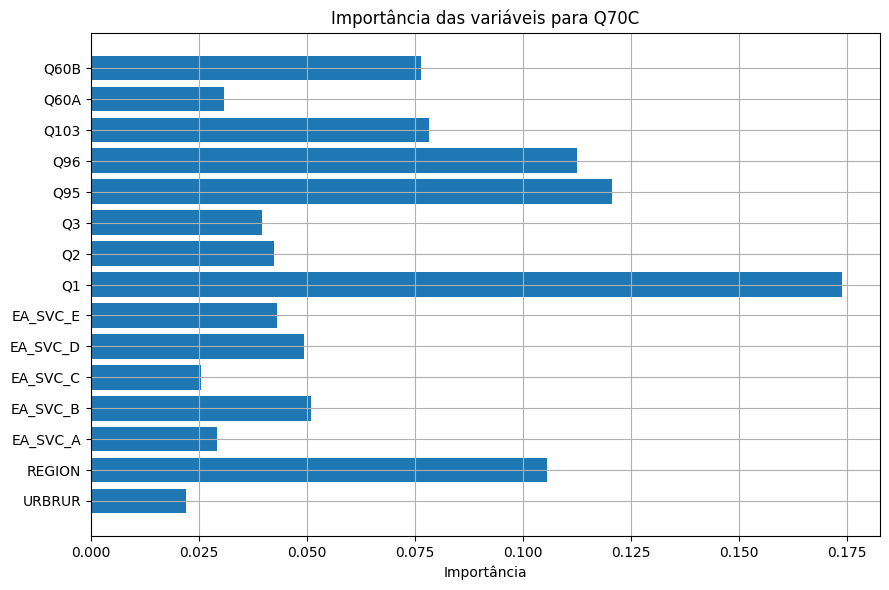

In [11]:
# 1. Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 2. Carregar os dados
arquivo = "ANG_R10_Converted.xlsx"
df = pd.read_excel(arquivo, sheet_name="Sheet1")

# 3. Definir variáveis
variaveis_alvo = ['Q70A', 'Q70B', 'Q70C']
variaveis_explicativas = ['URBRUR', 'REGION', 'EA_SVC_A', 'EA_SVC_B', 'EA_SVC_C', 'EA_SVC_D', 'EA_SVC_E']
variaveis_extras = ['Q1', 'Q2', 'Q3', 'Q4', 'Q95', 'Q96', 'Q103', 'Q60A', 'Q60B']

# 4. Confirmar se as variáveis extras existem
variaveis_extras_disponiveis = [v for v in variaveis_extras if v in df.columns]
todas_variaveis = variaveis_alvo + variaveis_explicativas + variaveis_extras_disponiveis

# 5. Criar dataset limpo e sem valores inválidos
df_modelo = df[todas_variaveis].dropna()
df_modelo = df_modelo[
    (df_modelo['Q70A'] <= 5) & (df_modelo['Q70B'] <= 5) & (df_modelo['Q70C'] <= 5)
]

X = df_modelo[variaveis_explicativas + variaveis_extras_disponiveis]
modelos = {}

# 6. Treinar modelos e mostrar relatório
for alvo in variaveis_alvo:
    y = df_modelo[alvo]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    modelo = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    print(f"\n--- Relatório para {alvo} ---")
    print(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose())

    modelos[alvo] = modelo

# 7. Gerar gráficos de importância das variáveis
for alvo in variaveis_alvo:
    modelo = modelos[alvo]
    importancias = modelo.feature_importances_
    variaveis = X.columns

    plt.figure(figsize=(9, 6))
    plt.barh(variaveis, importancias)
    plt.xlabel("Importância")
    plt.title(f"Importância das variáveis para {alvo}")
    plt.tight_layout()
    plt.grid(True)
    plt.show()



--- Relatório com SMOTE para Q70A ---
              precision    recall  f1-score     support
1              0.176471  0.157895  0.166667   19.000000
2              0.410256  0.355556  0.380952   45.000000
3              0.090909  0.066667  0.076923   15.000000
4              0.509091  0.549020  0.528302  102.000000
5              0.171429  0.193548  0.181818   31.000000
accuracy       0.386792  0.386792  0.386792    0.386792
macro avg      0.271631  0.264537  0.266932  212.000000
weighted avg   0.379338  0.386792  0.382012  212.000000

--- Relatório com SMOTE para Q70B ---
              precision    recall  f1-score     support
1              0.083333  0.090909  0.086957   11.000000
2              0.282051  0.275000  0.278481   40.000000
3              0.071429  0.076923  0.074074   13.000000
4              0.577982  0.562500  0.570136  112.000000
5              0.236842  0.250000  0.243243   36.000000
accuracy       0.400943  0.400943  0.400943    0.400943
macro avg      0.250327  0

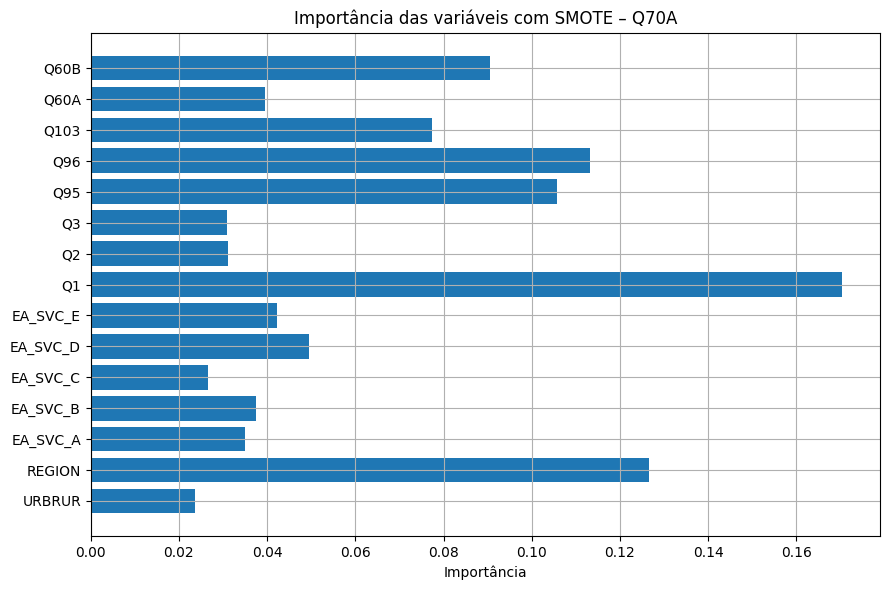

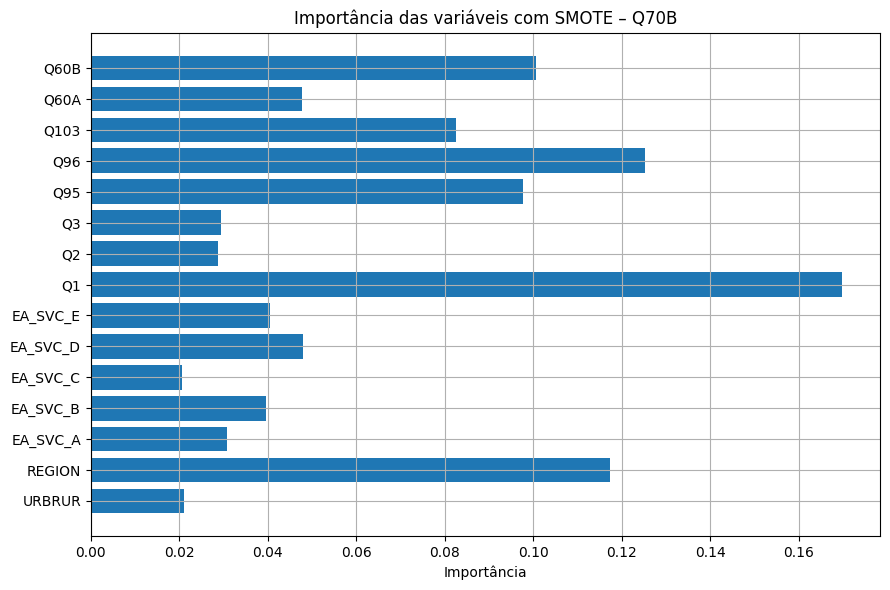

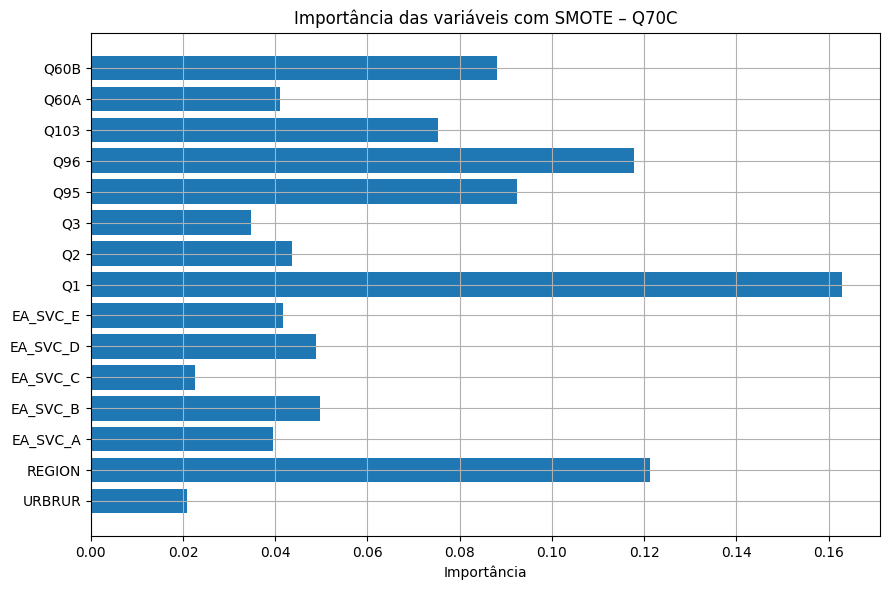

In [1]:
# 1. Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# 2. Carregar dados
arquivo = "ANG_R10_Converted.xlsx"
df = pd.read_excel(arquivo, sheet_name="Sheet1")

# 3. Definir variáveis
variaveis_alvo = ['Q70A', 'Q70B', 'Q70C']
variaveis_explicativas = ['URBRUR', 'REGION', 'EA_SVC_A', 'EA_SVC_B', 'EA_SVC_C', 'EA_SVC_D', 'EA_SVC_E']
variaveis_extras = ['Q1', 'Q2', 'Q3', 'Q4', 'Q95', 'Q96', 'Q103', 'Q60A', 'Q60B']
variaveis_extras_disponiveis = [v for v in variaveis_extras if v in df.columns]
todas_variaveis = variaveis_alvo + variaveis_explicativas + variaveis_extras_disponiveis

# 4. Criar dataset limpo
df_modelo = df[todas_variaveis].dropna()
df_modelo = df_modelo[
    (df_modelo['Q70A'] <= 5) & (df_modelo['Q70B'] <= 5) & (df_modelo['Q70C'] <= 5)
]

X = df_modelo[variaveis_explicativas + variaveis_extras_disponiveis]
modelos_smote = {}

# 5. Treinar modelos com SMOTE
for alvo in variaveis_alvo:
    y = df_modelo[alvo]
    
    # Dividir antes de aplicar SMOTE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Aplicar SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Treinar modelo
    modelo = RandomForestClassifier(n_estimators=100, random_state=42)
    modelo.fit(X_resampled, y_resampled)

    # Avaliar
    y_pred = modelo.predict(X_test)
    print(f"\n--- Relatório com SMOTE para {alvo} ---")
    print(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose())

    modelos_smote[alvo] = modelo

# 6. Gerar gráficos de importância
for alvo in variaveis_alvo:
    modelo = modelos_smote[alvo]
    importancias = modelo.feature_importances_
    plt.figure(figsize=(9, 6))
    plt.barh(X.columns, importancias)
    plt.xlabel("Importância")
    plt.title(f"Importância das variáveis com SMOTE – {alvo}")
    plt.tight_layout()
    plt.grid(True)
    plt.show()
